# Importing libraries

Libraries required for analysis will be imported here at once.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Dataset

Let's read the titanic dataset using pandas

In [2]:
titanic = pd.read_csv('titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

## Handling the missing Data

We can start our analysis by using seaborn's heat map to check where are the missing data.

In [4]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

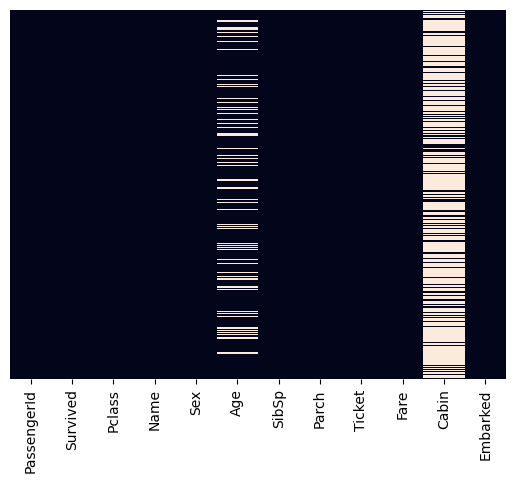

In [5]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False)

# Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class.

<Axes: xlabel='Pclass', ylabel='Age'>

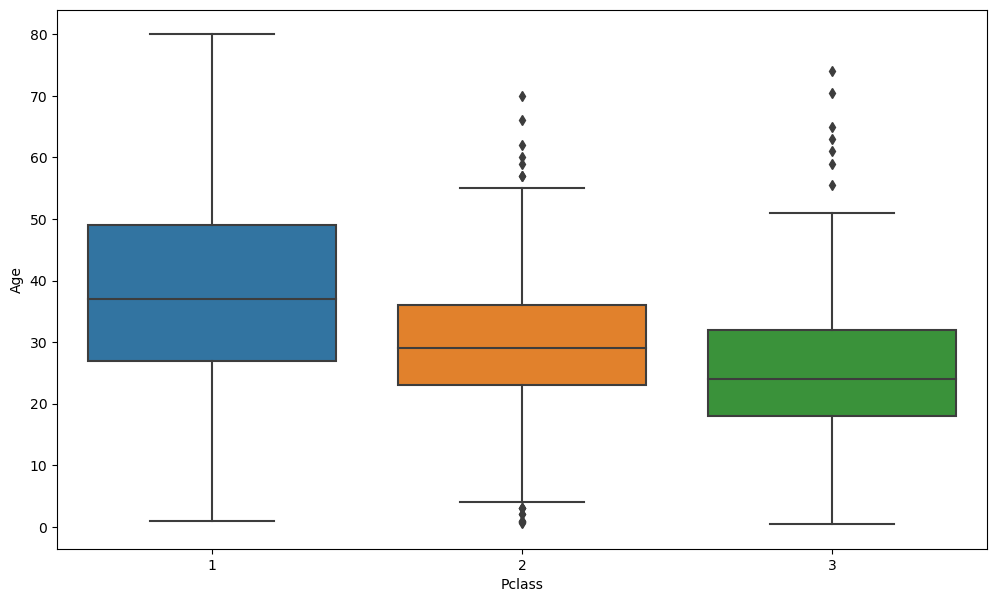

In [6]:
# Checking relationship between age & passenger class

plt.figure(figsize =(12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

In [7]:
# To replace the missing Age values , we can create a function & apply it to the dataframe

#function

def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [8]:
titanic['Age'] = titanic[['Age','Pclass']].apply(input_age, axis = 1)

<Axes: >

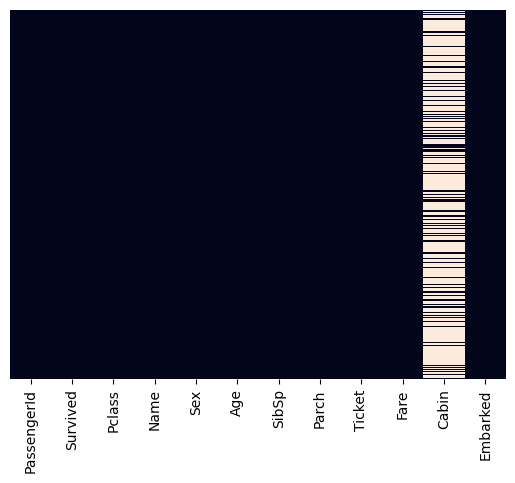

In [9]:
# Now checking the null values using Heatmap after Data Cleaning

sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False)

Now Age column has no null values


Also the Cabin column has too many null values so let's drop the column and also the rows having NaN value

In [10]:
# Dropping Cabin column

titanic.drop('Cabin', axis = 1, inplace = True)

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
# Now let's drop the rows having NaN values

titanic.dropna(inplace = True)

<Axes: xlabel='Survived', ylabel='count'>

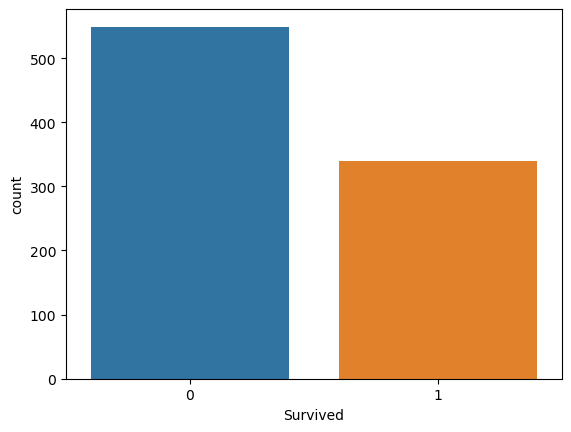

In [13]:
# Checking the Survival count 

sns.countplot(x = 'Survived', data = titanic)

<Axes: xlabel='Survived', ylabel='count'>

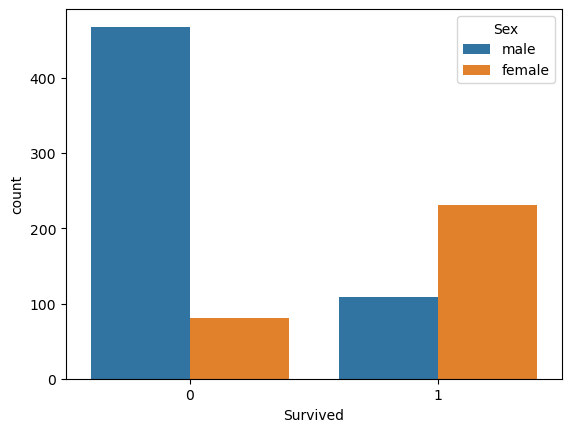

In [14]:
# Checking the survivors rate based on Gender

sns.countplot(x = 'Survived', hue = 'Sex', data = titanic)

<Axes: xlabel='Survived', ylabel='count'>

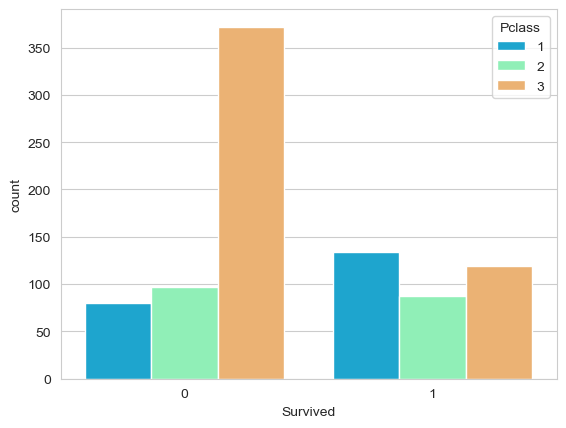

In [15]:
# Checking the survival count based on Passenger class

sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic, palette = 'rainbow')

C:\Users\91916\AppData\Local\Temp\ipykernel_23808\2577244183.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'].dropna(), kde = False, bins = 40)


<Axes: xlabel='Age'>

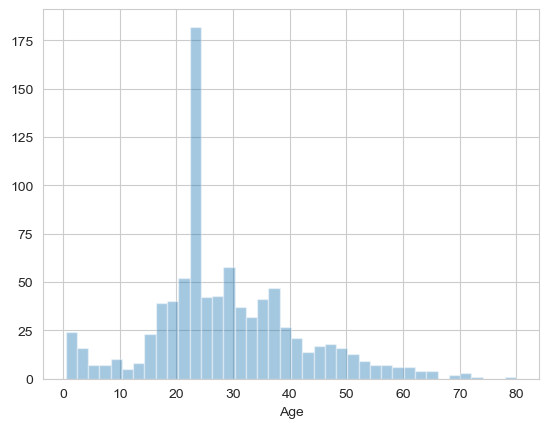

In [16]:
# Checking the age distribution among the passengers

sns.distplot(titanic['Age'].dropna(), kde = False, bins = 40)

<Axes: xlabel='SibSp', ylabel='count'>

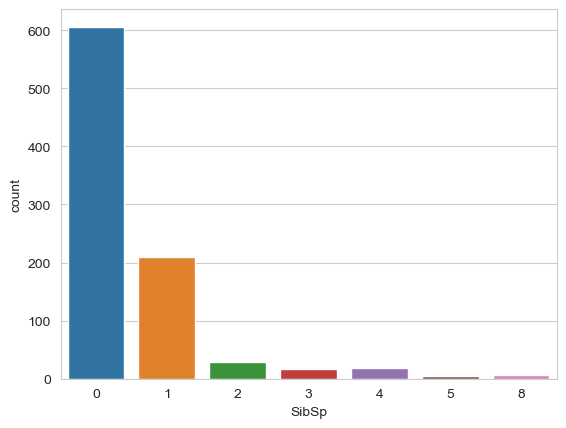

In [17]:
# Checking the count of Sibling-Spouse

sns.countplot(x = 'SibSp', data = titanic)

<Axes: >

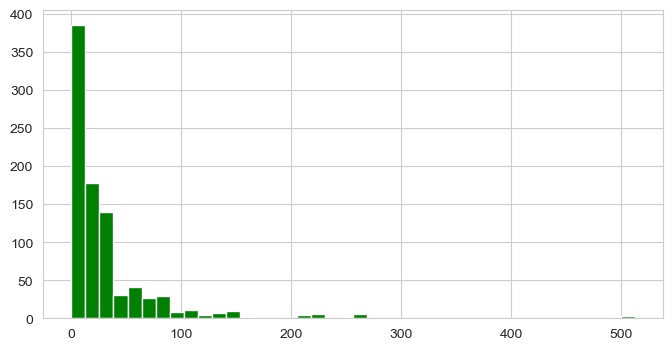

In [18]:
# Finiding fare distribution among the passengers

titanic['Fare'].hist(color = 'green', bins = 40, figsize = (8,4))